## Decision Tree Regressor

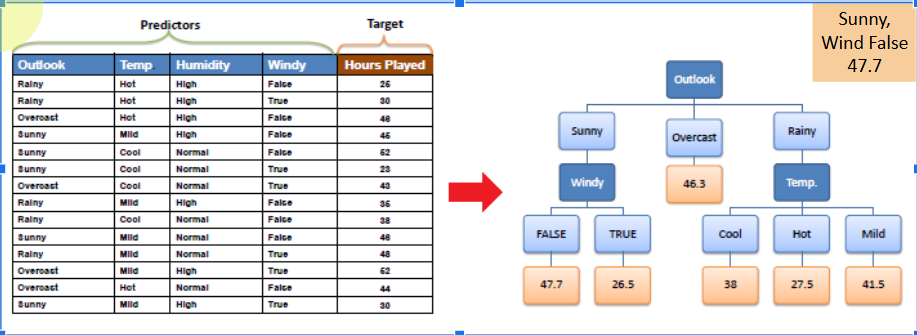

In [2]:

import pandas as pd

path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/PowerPlant.csv"
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43



## Power dataset
    AT: Atmospheric Temperature in celsius
    V: Vaccum Pressure in Pa
    AP: Atmospheric Pressure 
    RH: Relative Humidity
    PE: Power plant's Energy
## PE is the target feature 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(41)

## There are no missing values. However, we have 41 duplicated rows. Drop these rows

In [6]:
df = df.drop_duplicates()
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [7]:
df.duplicated().sum()

np.int64(0)

## Separate x & y features

In [8]:
x = df.drop(columns="PE")
y = df[["PE"]]

In [9]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Data cleaning

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(
    transform="pandas"
)

In [13]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [14]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Split the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain ,xtest, ytrain, ytest = train_test_split(
    x_pre,y,train_size=0.75,random_state=21
)

In [17]:
xtrain.head()

,AT,V,AP,RH
9077,0.031136,-0.740477,-0.861431,-0.413162
7398,1.528985,1.104917,-0.454038,-2.094577
3823,0.858647,0.873947,-0.640900,-1.453777
9439,0.602065,0.455364,0.559393,-1.044377
4499,0.553704,0.471129,0.805176,0.323484


In [18]:
xtest.head()

,AT,V,AP,RH
4903,0.340109,0.683180,1.061059,-0.367977
2944,0.023076,0.405701,-0.043279,1.225807
1771,-0.354409,-0.744418,0.192403,-0.730823
1450,-0.586811,-1.020320,-1.164450,0.631561
5399,-0.310078,-1.148812,-1.723353,-0.596639


## build the model

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model = DecisionTreeRegressor(
    max_depth=6,min_samples_split=10,min_samples_leaf=3,criterion="squared_error"
)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=10)

In [21]:
model.score(xtrain,ytrain)

0.9440847975892458

In [22]:
model.score(xtest,ytest)

0.9427587000154899

## Tree Pruning : handle overfitting screnario, also identify the best parameters for our model

In [23]:
params = {
    "max_depth": [2, 4, 6, 8, 10, 12],
    "min_samples_split": [1, 2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
    "criterion": ["squared_error", "absolute_error"],
}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
base_model = DecisionTreeRegressor()
rscv = RandomizedSearchCV(
    estimator=base_model,param_distributions=params,scoring="r2",cv=4

)
rscv.fit(xtrain,ytrain)

c:\ML 9\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ML 9\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ML 9\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\ML 9\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\ML 9\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8]},
                   scoring='r2')

In [26]:
rscv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'squared_error'}

In [27]:
rscv.best_score_

np.float64(0.9385773332274321)

In [28]:
best_DTR = rscv.best_estimator_
best_DTR.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=8)

In [29]:
best_DTR.score(xtrain,ytrain)

0.9556795309700008

In [30]:
best_DTR.score(xtest,ytest)

0.9453293923486754

## Model evaluation metrics

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
ypred_test = best_DTR.predict(xtest)
ypred_test

array([447.41140625, 448.25666667, 461.7712766 , ..., 467.68741573,
       468.84666667, 446.57294737], shape=(2382,))

In [33]:
ytest

,PE
4903,453.03
2944,446.15
1771,459.98
1450,466.27
5399,459.83
...,...
216,447.26
8849,446.34
7369,466.63
2012,473.01


In [34]:

mse = mean_squared_error(ytest, ypred_test)
mae = mean_absolute_error(ytest, ypred_test)
r2 = r2_score(ytest, ypred_test)
print(f"MSE:{mse}")
print(f"RMSE:{mse**0.5}")
print(f"MAE:{mae}")
print(f"R2 score: {r2}")

MSE:15.895270621552191
RMSE:3.9868873349459215
MAE:3.022431362333079
R2 score: 0.9453293923486754


## THis model can be considered for out of sample predictions as the squared error is minimal and r2 score is greater than 0.8

In [35]:

path2 = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/PowerPlantTest.csv"
xnew = pd.read_csv(path2)
xnew.head()

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [36]:

num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [37]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [38]:

PE_predicted = best_DTR.predict(xnew_pre)
PE_predicted = PE_predicted.round(2)
PE_predicted

array([444.73, 434.53, 441.07])

In [39]:

xnew["PE Predicted"] = PE_predicted
xnew

,AT,V,AP,RH,PE Predicted
0,25,51.5,1000.1,57.0,444.73
1,32,41.0,1051.1,80.0,434.53
2,28,NaN,1010.2,NaN,441.07


In [40]:

xnew.to_csv("Power Plant Energy Predictions.csv", index=False)